### Question 2

<img src="./imgs/hw9-q2.jpg" width="750" height="300">

### Question 4

<img src="./imgs/hw9-q4.jpg" width="750" height="300">

### Question 5

<img src="./imgs/hw9-q5.jpg" width="600" height="800">

### Question 7

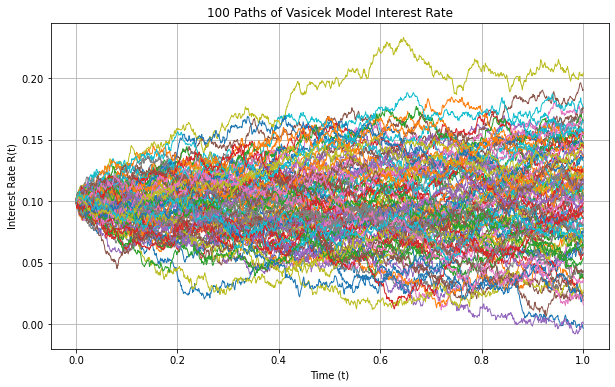

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Vasicek model
a = 0.1  # Mean reversion level
b = 0.1  # Mean reversion speed
sigma = 0.05  # Volatility
R0 = 0.1  # Initial interest rate
T = 1  # Time horizon
dt = 0.001  # Time step
n_steps = int(T / dt)  # Number of steps
n_paths = 100  # Number of paths

# Generate paths
np.random.seed(0)  # Set seed for reproducibility
paths = np.zeros((n_paths, n_steps + 1))
paths[:, 0] = R0

for i in range(1, n_steps + 1):
    dW = np.random.normal(0, np.sqrt(dt), n_paths)  # Brownian increments
    paths[:, i] = paths[:, i - 1] + b * (a - paths[:, i - 1]) * dt + sigma * dW

# Plotting the paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, n_steps + 1), paths[i, :], lw=1)

plt.title("100 Paths of Vasicek Model Interest Rate")
plt.xlabel("Time (t)")
plt.ylabel("Interest Rate R(t)")
plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Vasicek model parameters
a = 0.1  # Mean reversion level
b = 0.1  # Mean reversion speed
sigma = 0.05  # Volatility
R0 = 0.1  # Initial interest rate
T = 1  # Time horizon
dt = 0.001  # Time step
n_steps = int(T / dt)  # Number of steps
n_paths_mc = 10000  # Number of paths for Monte-Carlo

# Initialize paths for Monte-Carlo simulation
np.random.seed(0)  # Set seed for reproducibility
mc_paths = np.zeros((n_paths_mc, n_steps + 1))
mc_paths[:, 0] = R0

# Simulate paths
for i in range(1, n_steps + 1):
    dW = np.random.normal(0, np.sqrt(dt), n_paths_mc)
    mc_paths[:, i] = mc_paths[:, i - 1] + b * (a - mc_paths[:, i - 1]) * dt + sigma * dW

# Calculate the integral of R(s) over each path and bond price
integral_Rs = np.sum(mc_paths[:, :-1], axis=1) * dt
bond_prices = np.exp(-integral_Rs)
bond_price_mc = np.mean(bond_prices)

print("Monte-Carlo estimated bond price:", bond_price_mc)


Monte-Carlo estimated bond price: 0.9049310969905023


We evaluate the Hull-White model for pricing \( B(0,T) \) as follows:

$$ B(0,T) = R(0)C(0,T) - A(0,T) $$

$$ C(t,T) = \int_{0}^{T} e^{-\int_{0}^{s} u du} ds = \int_{0}^{T} e^{-\frac{1}{2}s^2} ds = 1 - e^{-\frac{T^2}{2}} $$

Now, \( A(0,T) = \int_{0}^{T} \left(0.1C(s,T) - \frac{1}{2}(0.05)^2C^2(s,T)\right)ds \)

$$ A(0,T) = \int_{0}^{T} 0.1 C(s, T) - \frac{1}{2} (0.05)^{2} C^{2}(s, t) ds = \int_{0}^{T} 0.1 - 0.1e^{s - t} - 0.00125 -  0.00125 e^{2 (s - T)} + 0.0025e^{s-T} ds =$$

$$= 0.1T - 0.1e^{-\frac{T^2}{2}} - 0.00125T - 0.00125e^{-\frac{T^2}{2}(e^{T}-1)} + 0.0025e^{-\frac{T^2}{2}}(e^{\frac{T^2}{2}} - 1) = $$

$$ = 0.09875T - 0.0975(1 - e^{-\frac{T^2}{2}}) - 0.000625(1 - e^{-\frac{T^2}{2}}(e^T - 1)) $$

Now setting \( T = 1 \) we have:

$$ C(0,1) = 1 - e^{-1} = 0.632121 $$

$$ A(0,1) = 0.09875 - 0.0975(1 - e^{-1}) - 0.000625(1 - e^{-2}) = 0.0365778 $$

$$ B(0,1) = e^{-0.1 * 0.632121} - 0.0365778 = 0.905028 $$

Observe that the monte-carlo simulations for the Vasicek model is fairly accurate when compared to the closed form solution.